## Defining signal/noise regions, weighting arrays etc ##


### Tiff's notes ###
 - Example shown for 2nd order power-law. The weighting array is a very simple signal/noise region - this won't give the best results!
 - Many different sets of weighting arrays can be generated for a single target; these will be saved in their own folders to keep things clear and avoiding the need for replicating definitions. Make sure that all parameters required to reproduce the array are saved - either in the folder name or (probably neater) in a separate text file. 
 - It would probably be useful to extend this to create different weighting arrays for different cost function terms. This should be very straightforward, but try to keep everything organised otherwise it will quickly become confusing!
 - Although a range of weighting arrays will be used, most will probably be based quite heavily on the target: might be useful to define params from the information given in targetdir.

### Preamble; plot definitions ###

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

def quick_plot(target, params):
    N = target.shape[0]
    x0 = params['r0'][0]
    
    plot_args = {'extent': [0, N, 0, N],
                 'interpolation': 'None',
                 'origin': 'lower'}
    fig, axes = plt.subplots(ncols=1)
    axes[0].imshow(target, **plot_args)
    axes[0].set_title('Cost function weighting')

### Load target ###

In [ ]:
targetdir = '/initialisation/example_power2_512_\(350\,350\)_64/'

target = np.loadtxt(os.path.join(targetdir, 'target.dat'))

### Weighting array ###


Saved to targets/example_power2_512_(350,350)_64.dat


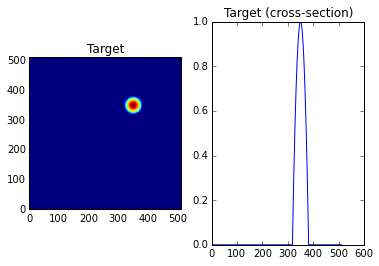

In [2]:
def make_(n, r0, d, A=1.0,):
    """
    Create n x n weighting array: 
    As a simple example, just have a step change between flat signal and noise regions.
    """
    x = np.array(range(n))*1.
    X, Y = np.meshgrid(x, x)
    
    delta_r2 = np.power(X - r0[0], 2) + np.power(Y - r0[1], 2)
    z = np.array(range(n))*1.
    z[delta_r2 > d**2/4] = 0
    
    return z


params = {'n': 512,
          'r0': (350, 350),
          'd': 64,
          'A': 1.0}


t = make_power2(**params)
filename = 'targets/example_power2_{n}_{r0}_{d}.dat'.format(**params).replace(' ', '')
quick_plot(t, params)
np.savetxt(filename, t)
print 'Saved to ' + filename